In [3]:
!pip3 install scikit_learn

In [4]:
from sklearn.datasets import load_iris
iris=load_iris()

In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
import pandas as pd
df=pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [7]:
df["Variety"] = iris.target
df.loc[df["Variety"] == 0, "Variety"] == "setosa"
df.loc[df["Variety"] == 1, "Variety"] == "versicolor"
df.loc[df["Variety"] == 2, "Variety"] == "virginica"
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Variety  
0        0  
1        0  
2        0  
3        0  
4        0  


In [8]:
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     Variety  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


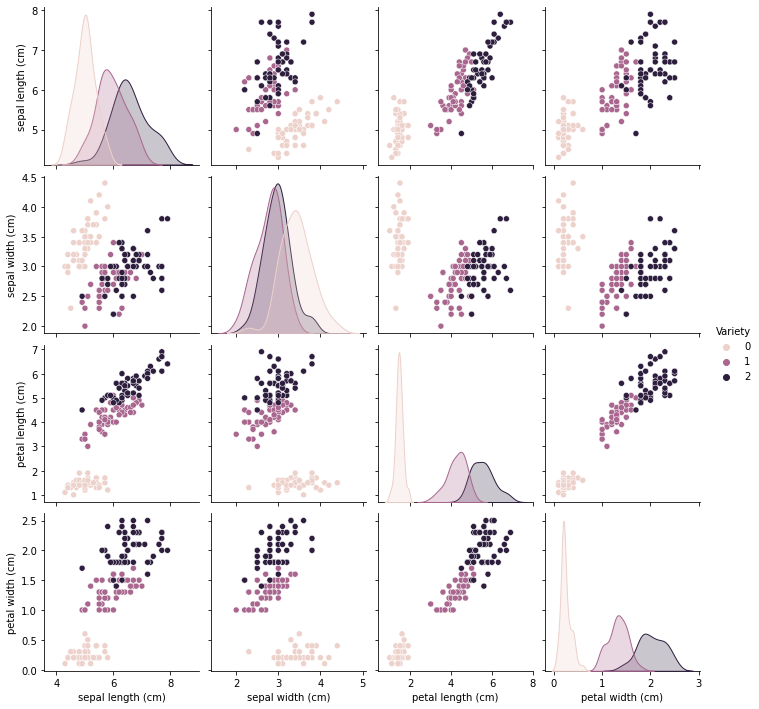

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df, hue="Variety")
plt.show()

In [10]:
#ここから
#ディープラーニング
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [11]:
import torch 
from torch.utils.data import TensorDataset, DataLoader
from torch import nn
import torch.nn.functional as F
from torch import optim

In [12]:
iris = load_iris()
data = iris.data
label = iris.target

In [13]:
train_data, test_data, train_label, test_label = train_test_split(
            data, label, test_size=0.2)
print("train_data size: {}".format(len(train_data)))
print("test_data size: {}".format(len(test_data)))
print("train_label size: {}".format(len(train_label)))
print("test_label size: {}".format(len(test_label)))

train_data size: 120
test_data size: 30
train_label size: 120
test_label size: 30


In [14]:
train_x = torch.Tensor(train_data)
test_x = torch.Tensor(test_data)
train_y = torch.LongTensor(train_label)
test_y = torch.LongTensor(test_label)

In [15]:
train_dataset = TensorDataset(train_x, train_y)
test_dataset = TensorDataset(test_x, test_y)

In [16]:
train_batch = DataLoader(
    dataset=train_dataset,
    batch_size=5,
    shuffle=True,
    num_workers=2)
test_batch = DataLoader(
    dataset=test_dataset,
    batch_size=5,
    shuffle=False,
    num_workers=2)
for data, label in train_batch:
    print("batch data size: {}".format(data.size()))
    print("batch label size: {}".format(label.size()))
    break

batch data size: torch.Size([5, 4])
batch label size: torch.Size([5])


In [17]:
for data, label in train_batch:
    print("batch data size: {}".format(data.size()))
    print("batch label size: {}".format(label.size()))
    break

batch data size: torch.Size([5, 4])
batch label size: torch.Size([5])


In [18]:
class Net(nn.Module):
    def __init__(self, D_in, H ,D_out):
        super(Net, self).__init__()
        self.linear1 = torch.nn.Linear(D_in,H)
        self.linear2 = torch.nn.Linear(H,D_out)
    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = self.linear2(x)
        return x

In [19]:
D_in=4
H=100
D_out=3
epoch=100

In [20]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = Net(D_in,H,D_out).to(device)
print("Device: {}".format(device))

Device: cpu


In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

In [22]:
train_loss_list = []
train_accuracy_list = []
test_loss_list = []
test_accuracy_list = []

for i in range(epoch):
    print("--------------------------------")
    print("Epoch: {}/{}".format(i+1, epoch))
    train_loss = 0
    train_accuracy = 0
    test_loss = 0
    test_accuracy = 0
    
    net.train()
    for data, label in train_batch:
        data = data.to(device)
        label = label.to(device)
        optimizer.zero_grad()
        y_pred_prod = net(data)
        loss = criterion(y_pred_prod, label)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        y_pred_label = torch.max(y_pred_prod,1)[1]
        train_accuracy += torch.sum(y_pred_label == label).item()/len(label)
    batch_train_loss = train_loss/len(train_batch)
    batch_train_accuracy = train_accuracy / len(train_batch)
    
    net.eval()
    with torch.no_grad():
        for data, label in test_batch:
            data = data.to(device)
            label = label.to(device)
            optimizer.zero_grad()
            y_pred_prod = net(data)
            loss = criterion(y_pred_prod, label)
            test_loss += loss.item()
            y_pred_label = torch.max(y_pred_prod, 1)[1]
            test_accuracy += torch.sum(y_pred_label == label).item()/len(label)
    batch_test_loss = test_loss/len(test_batch)
    batch_test_accuracy = test_accuracy/len(test_batch)
    
    print("Train_loss: {:.4f} Train_Accuracy: {:.4f}".format(
    batch_train_loss, batch_train_accuracy))
    
    print("Test_loss: {:.4f} Test_Accuracy: {:.4f}".format(
    batch_test_loss, batch_test_accuracy))
        
    train_loss_list.append(batch_train_loss)
    train_accuracy_list.append(batch_train_accuracy)
    test_loss_list.append(batch_test_loss)
    test_accuracy_list.append(batch_test_accuracy)

--------------------------------
Epoch: 1/100
Train_loss: 0.9537 Train_Accuracy: 0.5583
Test_loss: 0.8073 Test_Accuracy: 0.9000
--------------------------------
Epoch: 2/100
Train_loss: 0.7269 Train_Accuracy: 0.9417
Test_loss: 0.6208 Test_Accuracy: 0.9333
--------------------------------
Epoch: 3/100
Train_loss: 0.6053 Train_Accuracy: 0.8250
Test_loss: 0.5221 Test_Accuracy: 0.9667
--------------------------------
Epoch: 4/100
Train_loss: 0.5301 Train_Accuracy: 0.8917
Test_loss: 0.4479 Test_Accuracy: 0.9000
--------------------------------
Epoch: 5/100
Train_loss: 0.4770 Train_Accuracy: 0.9167
Test_loss: 0.4173 Test_Accuracy: 1.0000
--------------------------------
Epoch: 6/100
Train_loss: 0.4411 Train_Accuracy: 0.9250
Test_loss: 0.3663 Test_Accuracy: 0.9667
--------------------------------
Epoch: 7/100
Train_loss: 0.4085 Train_Accuracy: 0.9250
Test_loss: 0.3990 Test_Accuracy: 0.9000
--------------------------------
Epoch: 8/100
Train_loss: 0.4020 Train_Accuracy: 0.9083
Test_loss: 0.362

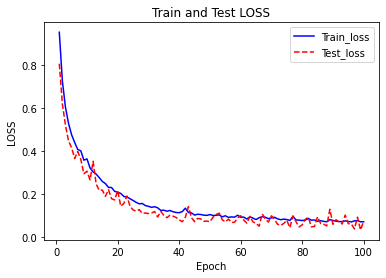

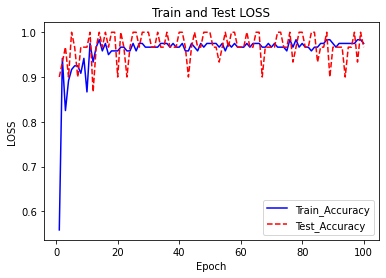

In [23]:
plt.figure()
plt.title("Train and Test LOSS")
plt.xlabel("Epoch")
plt.ylabel("LOSS")
plt.plot(range(1, epoch+1), train_loss_list, color="blue",
        linestyle="-", label="Train_loss")
plt.plot(range(1, epoch+1), test_loss_list, color="red",
        linestyle="--", label="Test_loss")
plt.legend()

plt.figure()
plt.title("Train and Test LOSS")
plt.xlabel("Epoch")
plt.ylabel("LOSS")
plt.plot(range(1, epoch+1), train_accuracy_list, color="blue",
        linestyle="-", label="Train_Accuracy")
plt.plot(range(1, epoch+1), test_accuracy_list, color="red",
        linestyle="--", label="Test_Accuracy")
plt.legend()
plt.show()

In [24]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.save(net.to(device).state_dict(),"3-2_iris_net.pth")

In [25]:
D_in = 4
H = 100
D_out = 3

net2 = Net(D_in, H, D_out).to(device)
net2.load_state_dict(torch.load("3-2_iris_net.pth", map_location=device))

<All keys matched successfully>

In [26]:
batch_test_accuracy = test_accuracy / len(test_batch)
print("Accuracy: {:.3f}".format(batch_test_accuracy))

Accuracy: 0.967


In [27]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [28]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [29]:
import pandas as pd
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df["target"] = diabetes.target

print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [30]:
print(df.describe())

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.

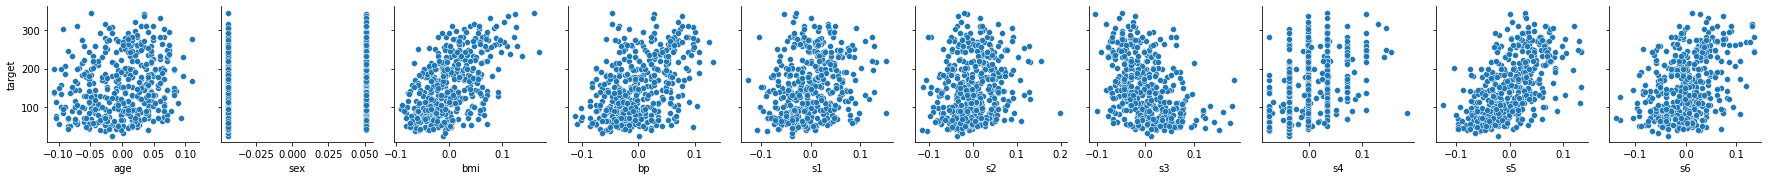

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df, x_vars=diabetes.feature_names, y_vars="target")
plt.show()

In [32]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset, DataLoader
from torch import nn
import torch.nn.functional as F
from torch import optim

In [33]:
diabetes = load_diabetes()
data = diabetes.data
label = diabetes.target.reshape(-1,1)
print("data size: {}".format(data.shape))
print("label size: {}".format(label.shape))

data size: (442, 10)
label size: (442, 1)


In [34]:
train_data, test_data, train_label, test_label = train_test_split(
data, label, test_size=0.2)

print("train_data size: {}".format(len(train_data)))
print("test_data size: {}".format(len(test_data)))
print("train_label size: {}".format(len(train_label)))
print("test_label size: {}".format(len(test_label)))

train_data size: 353
test_data size: 89
train_label size: 353
test_label size: 89


In [35]:
train_x = torch.Tensor(train_data)

In [36]:
test_x = torch.Tensor(test_data)
train_y = torch.Tensor(train_label)
test_y = torch.Tensor(test_label)

In [37]:
train_dataset = TensorDataset(train_x, train_y)
test_dataset = TensorDataset(test_x, test_y)

In [38]:
train_batch = DataLoader(
    dataset=train_dataset,
    batch_size=20,
    shuffle=True,
    num_workers=2)
test_batch = DataLoader(
    dataset=test_dataset,
    batch_size=20,
    shuffle=False,
    num_workers=2)
for data, label in train_batch:
    print("batch data size: {}".format(data.size()))
    print("batch label size: {}".format(label.size()))
    break

batch data size: torch.Size([20, 10])
batch label size: torch.Size([20, 1])


In [39]:
class Net(nn.Module):
    def __init__(self, D_in, H ,D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in,H)
        self.linear2 = nn.Linear(H,H)
        self.linear3 = nn.Linear(H,D_out)
        self.dropout = nn.Dropout(p=0.5)
    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = F.relu(self.linear2(x))
        x = self.dropout(x)
        x = self.linear3(x)
        return x

In [40]:
D_in=10
H = 200
D_out=1
epoch=100

In [41]:
#実行する環境を指定
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = Net(D_in,H,D_out).to(device)
print("Device: {}".format(device))#デバイスの確認

Device: cpu


In [42]:
criterion = nn.MSELoss()
criterion2 = nn.L1Loss()
optimizer = optim.Adam(net.parameters())

In [43]:
train_loss_list = []
train_mae_list = []
test_loss_list = []
test_mae_list = []

for i in range(epoch):
    print("--------------------------------")
    print("Epoch: {}/{}".format(i+1, epoch))
    train_loss = 0
    train_mae = 0
    test_loss = 0
    test_mae = 0
    
    net.train()
    for data, label in train_batch:
        data = data.to(device)
        label = label.to(device)
        optimizer.zero_grad()
        y_pred = net(data)
        loss = criterion(y_pred, label)
        mae = criterion2(y_pred, label)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        train_mae += mae.item()

    batch_train_loss = train_loss/len(train_batch)
    batch_train_mae = train_mae / len(train_batch)
    
    net.eval()
    with torch.no_grad():
        for data, label in test_batch:
            data = data.to(device)
            label = label.to(device)
            y_pred = net(data)
            loss = criterion(y_pred, label)
            mae = criterion2(y_pred, label)
            test_loss += loss.item()
            test_mae += mae.item()

    batch_test_loss = test_loss/len(test_batch)
    batch_test_mae = test_mae/len(test_batch)
    
    print("Train_loss: {:.4f} Train_Mae: {:.4f}".format(
    batch_train_loss, batch_train_mae))
    
    print("Test_loss: {:.4f} Test_Mae: {:.4f}".format(
    batch_test_loss, batch_test_mae))
        
    train_loss_list.append(batch_train_loss)
    test_loss_list.append(batch_test_loss)
    train_mae_list.append(batch_train_mae)
    test_mae_list.append(batch_test_mae)

--------------------------------
Epoch: 1/100
Train_loss: 29374.1369 Train_Mae: 153.0497
Test_loss: 26373.8691 Test_Mae: 143.6133
--------------------------------
Epoch: 2/100
Train_loss: 27387.5660 Train_Mae: 146.4365
Test_loss: 21695.3523 Test_Mae: 126.4548
--------------------------------
Epoch: 3/100
Train_loss: 17773.7351 Train_Mae: 108.9840
Test_loss: 8563.7408 Test_Mae: 67.6821
--------------------------------
Epoch: 4/100
Train_loss: 6088.1044 Train_Mae: 63.5754
Test_loss: 5953.2432 Test_Mae: 68.7920
--------------------------------
Epoch: 5/100
Train_loss: 5492.7621 Train_Mae: 63.0817
Test_loss: 4490.4410 Test_Mae: 57.7710
--------------------------------
Epoch: 6/100
Train_loss: 5145.3925 Train_Mae: 61.0597
Test_loss: 4253.2504 Test_Mae: 56.9616
--------------------------------
Epoch: 7/100
Train_loss: 4562.3620 Train_Mae: 57.9865
Test_loss: 4088.3655 Test_Mae: 55.8028
--------------------------------
Epoch: 8/100
Train_loss: 4580.9936 Train_Mae: 57.7169
Test_loss: 3800.5971 

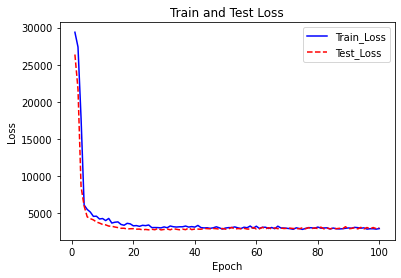

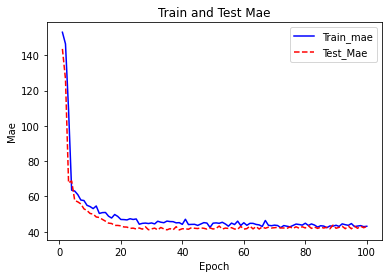

In [49]:
plt.figure()
plt.title("Train and Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(range(1,epoch+1), train_loss_list, color="blue",
        linestyle="-", label="Train_Loss")
plt.plot(range(1,epoch+1),test_loss_list,color="red",
        linestyle="--", label="Test_Loss")
plt.legend()

plt.figure()
plt.title("Train and Test Mae")
plt.xlabel("Epoch")
plt.ylabel("Mae")
plt.plot(range(1,epoch+1), train_mae_list, color="blue",
        linestyle="-", label="Train_mae")
plt.plot(range(1,epoch+1),test_mae_list,color="red",
        linestyle="--", label="Test_Mae")
plt.legend()